In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

/Users/junhaozhu/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/junhaozhu/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
tau_lst = [0,0.25,0.5,0.75,1.0,0.125,0.375]

T_lst=[50,100,500]
 

In [4]:
p3lst = []
#p2lst = []
for a in range(len(tau_lst)):
    for b in range(len(T_lst)):
        tau = tau_lst[a]
        T =T_lst[b]# sample size
        p3now = np.load('first-order-power-origin/sphere_pval_eu' +'_tau_'+str(a)+'_T_'+str(b)+'.npy')
        #p2now=np.load('pval_bias' +'_tau_'+str(a)+'_T_'+str(b)+'.npy')
        p3lst.append((tau,np.rint(T) , np.mean(p3now<=0.05) ))
        #p2lst.append((tau,np.rint(T) , np.mean(p2now<=0.05)))

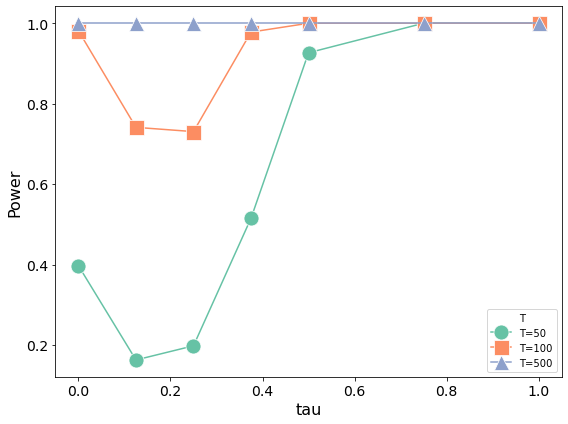

In [5]:

# Assuming p3lst is defined and contains your data
p3_array = np.array(p3lst, dtype=[('tau', 'f4'), ('T', 'f4'), ('p', 'f4')])
p3_df = pd.DataFrame(p3_array)

# Define a color palette and markers
palette = sns.color_palette("Set2")  # You can choose other palettes
markers = ["o", "s", "^", "D", "x", "*", "P"]  # Different marker styles

# Plot using seaborn
plt.figure(figsize=(8, 6))
for i, (T, grp) in enumerate(p3_df.groupby('T')):
    sns.lineplot(data=grp, x='tau', y='p', label=f'T={int(T)}',
                 color=palette[i % len(palette)], marker=markers[i % len(markers)],markersize=15)

#plt.title('Power curves for first order stationarity test in sphere', fontsize=15)
plt.xlabel('tau',size=16)
plt.ylabel('Power',size=16)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.legend(title='T')
plt.tight_layout()


plt.savefig('Power_sphere_eu.png',facecolor='w')